In [15]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.preprocessing.image as p

Found 200 images belonging to 2 classes.


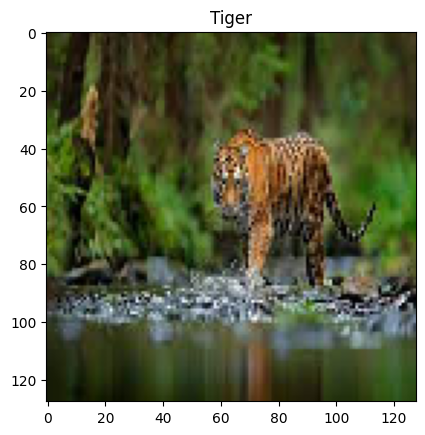

In [18]:
y_dict = {0:'Lion',1:'Tiger'}

img_gen = p.ImageDataGenerator(rescale= 1./255.)
imgs = img_gen.flow_from_directory('./img_data/',target_size=(128,128))
x_train,y_train=imgs.next()

plt.imshow(x_train[0])
plt.title(y_dict[y_train[0].argmax()])
plt.show()

In [24]:
print(f'x_train.shape => {x_train.shape}')
print(f'y_train.shape => {y_train.shape}')

x_train.shape => (32, 128, 128, 3)
y_train.shape => (32, 2)


In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=(5,5),
    strides=1,
    activation='relu',
    padding='same',
    input_shape=(128,128,3)
))

model.add(tf.keras.layers.MaxPool2D(
    pool_size=(2,2),
    input_shape=(124,124,32)
))

model.add(tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=(5,5),
    strides=1,
    activation='relu',
    padding='same',
    input_shape=(62,62,32)
))
model.add(tf.keras.layers.Flatten()) 
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='softmax'))

In [46]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["acc"]) 

In [47]:
model.fit(x_train,y_train,epochs=32)

Epoch 1/32
1/1 [==============================] - 0s 263ms/step - loss: 0.6806 - acc: 0.6250
Epoch 2/32
1/1 [==============================] - 0s 41ms/step - loss: 1.0469 - acc: 0.4688
Epoch 3/32


2022-12-08 17:08:26.307741: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 41ms/step - loss: 5.2861 - acc: 0.5312
Epoch 4/32
1/1 [==============================] - 0s 40ms/step - loss: 2.5024 - acc: 0.5312
Epoch 5/32
1/1 [==============================] - 0s 41ms/step - loss: 0.6815 - acc: 0.5625
Epoch 6/32
1/1 [==============================] - 0s 40ms/step - loss: 0.7153 - acc: 0.4688
Epoch 7/32
1/1 [==============================] - 0s 40ms/step - loss: 0.3712 - acc: 0.9375
Epoch 8/32
1/1 [==============================] - 0s 41ms/step - loss: 0.7382 - acc: 0.6562
Epoch 9/32
1/1 [==============================] - 0s 41ms/step - loss: 0.5449 - acc: 0.6562
Epoch 10/32
1/1 [==============================] - 0s 40ms/step - loss: 0.4280 - acc: 0.7812
Epoch 11/32
1/1 [==============================] - 0s 39ms/step - loss: 0.2269 - acc: 0.9688
Epoch 12/32
1/1 [==============================] - 0s 41ms/step - loss: 0.2585 - acc: 0.9375
Epoch 13/32
1/1 [==============================] - 0s 40ms/step - loss: 0.2689 - acc: 0.

In [42]:
y_dict[model.predict(x_train[3].reshape(1,128,128,3)).argmax()]

1/1 [==============================] - 0s 15ms/step


'Lion'

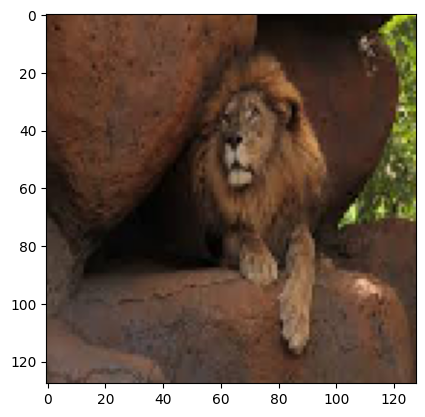

In [44]:
plt.imshow(x_train[3])